In [1]:
# import libraries
import numpy as np 
import matplotlib.pyplot as plt
import torch 

In [9]:
# defining image folders paths
TRAIN_IMAGE = 'D:\\acedemic folders\\6th semester\\projects\\ML-For-Facial-Expression-Recognition\\train'
VALIDATION_IMAGE = 'D:\\acedemic folders\\6th semester\\projects\\ML-For-Facial-Expression-Recognition\\validation'

LR = 0.001 #This variable represents the learning rate for the model's optimizer.
BATCH_SIZE = 32 #This variable represents the number of images in each training batch.
EPOCHS = 25 #This variable represents the number of times the model will iterate over the entire training dataset.

DEVICE = 'cuda' #This variable specifies the device on which the model will be trained.
MODEL_NAME = 'efficientnet_b0' #This variable represents the name or identifier of the model architecture that will be used for facial expression recognition.

In [10]:
# import libraries to implement pytorch
from torchvision.datasets import ImageFolder
from torchvision import transforms as T

In [11]:
# This variable represents a sequence of image augmentation transformations to be applied to the training images.
train_aug = T.Compose([ # The T.Compose() function is used to combine multiple transformations into a single pipeline
    T.RandomHorizontalFlip(p = 0.5), #  This transformation randomly flips the image horizontally with a probability of 0.5. It helps the model to generalize by considering both original and horizontally flipped images during training.
    T.RandomRotation(degrees = (-20, +20)), # This transformation randomly rotates the image by a degree within the range of -20 to +20. It introduces variability and allows the model to learn from slightly rotated images, enhancing its ability to recognize facial expressions from different angles.
    T.ToTensor() # This transformation converts the augmented image to a tensor. 
])

valid_aug = T.Compose([ # valid_aug variable represents a sequence of image augmentation transformations to be applied to the validation images.
    T.ToTensor()
])

# Overall, the image augmentation transformations defined in train_aug and valid_aug help introduce variations and increase the diversity of the training data while maintaining the original image format. This augmentation process can improve the model's ability to generalize and perform well on unseen data by exposing it to different orientations and perspectives of facial expressions during training.
# how the index of image change when transform from numpy arr into torch tensor
# numpy arr (h, w, c) -> (c, h, w)

In [12]:
trainset = ImageFolder(TRAIN_IMAGE, transform=train_aug)
validset = ImageFolder(VALIDATION_IMAGE, transform=valid_aug)

In [13]:
print(f"Total no. of examples in trainset : {len(trainset)}")
print(f"Total no. of examples in validset : {len(validset)}")

Total no. of examples in trainset : 28821
Total no. of examples in validset : 7066


In [14]:
print(trainset.class_to_idx)

# The code print(trainset.class_to_idx) is used to display the mapping between class labels and their corresponding indices in the training dataset (trainset). When working with image classification tasks, the class_to_idx attribute of the dataset provides a dictionary that maps class labels to numerical indices.
#In the code snippet, trainset.class_to_idx is printed, which will output the dictionary containing the class-to-index mapping for the training dataset. Each class label is represented as a key in the dictionary, and its corresponding index is the value associated with that key.
#For example, if you have three classes in your training dataset: "happy", "sad", and "angry", the class_to_idx dictionary may look like this:

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


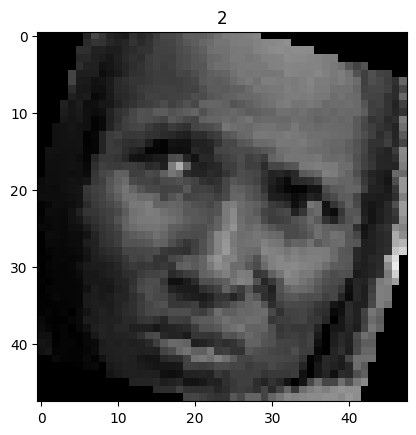

In [22]:
# getting the image and the label from the trainset
image, label = trainset[6000]
# p;ot the image using permutation
plt.imshow(image.permute(1, 2, 0))#(h, w, c)
plt.title(label);

# the shape (C, H, W), where C represents the number of channels, H represents the height, and W represents the width of the image. However, the plt.imshow() function expects the image to have the shape (H, W, C) to display it correctly.
# The image.permute(1, 2, 0) operation rearranges the dimensions of the tensor according to the provided permutation (1, 2, 0). This means that the second dimension of the tensor will become the first dimension, the third dimension will become the second dimension, and the original first dimension will become the third dimension.

In [23]:
from torch.utils.data import DataLoader # Data loaders provide an efficient way to load and iterate over the dataset in mini-batches during the training process.

In [24]:
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True) # trainloader is created using the DataLoader class. It takes the trainset dataset as input and specifies the batch size (BATCH_SIZE) and the shuffle parameter set to True. The shuffle=True argument means that the training dataset will be randomly shuffled during the training process, which helps in preventing the model from learning the order of the samples.
validloader = DataLoader(validset, batch_size=BATCH_SIZE) # validloader is created in a similar way but does not include the shuffle parameter. By default, the shuffle parameter is set to False, which means the validation dataset will not be shuffled during evaluation.

In [25]:
print(f"Total no. of batches in trainloader : {len(trainloader)}")
print(f"Total no. of batches in validloader : {len(validloader)}")

Total no. of batches in trainloader : 901
Total no. of batches in validloader : 221


In [26]:
for images, labels in trainloader: # This loop iterates over the trainloader and retrieves the first mini-batch of images and corresponding labels. The loop is stopped after the first iteration using the break statement.
    break;
    
print(f"One image batch shape : {images.shape}")
print(f"One label batch shape : {labels.shape}")

One image batch shape : torch.Size([32, 3, 48, 48])
One label batch shape : torch.Size([32])


In [29]:
import timm 
import torch.nn as nn

In [33]:
import torch.nn as nn
import timm

class FaceModel(nn.Module):
    def __init__(self):
        super(FaceModel, self).__init__()
        
        # Initialize the efficientnet_b0 model from the timm library
        # with pretrained weights and 7 output classes
        self.eff_net = timm.create_model('efficientnet_b0', pretrained=True, num_classes=7)
        
    def forward(self, images, labels=None):
        # Forward pass of the model
        
        # Pass the images through the efficientnet_b0 model
        logits = self.eff_net(images)
        
        if labels is not None:
            # If labels are provided, calculate the cross-entropy loss
            # between the logits and the labels
            loss = nn.CrossEntropyLoss()(logits, labels)
            return logits, loss
        
        # If labels are not provided, return the logits
        return logits

    
#The purpose of this code is to define a custom face model based on the efficientnet_b0 architecture and provide the functionality to perform forward passes and calculate the loss during training. The forward() method encapsulates the computation performed by the model and enables flexibility in training and inference scenarios.

In [34]:
model = FaceModel()
model.to(DEVICE)

C:\Users\NisalaInduwara\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\NisalaInduwara\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


AssertionError: Torch not compiled with CUDA enabled